In [1]:
import torch
from torch.autograd import Variable
from torch import nn
from torch import optim
from torch.nn import functional as F

#import dlc_practical_prologue as prologue
from Utils.DataImport import DataImport
from Utils.errs import compute_nb_errors as errorr
from Utils.Networks import CNN
import matplotlib.pyplot as plt

In [2]:
#set to use CPU or GPU automatically based on what is available
def select_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
device = select_device()
print('Device is',device)

D = DataImport(device)
Train, Test = D.Train, D.Test

train_input = Train["Train Input"]
test_input = Test["Test Input"]

train_input_0 = torch.reshape(train_input[:,0,:,:], (-1, 1, 14, 14))
train_input_1 = torch.reshape(train_input[:,1,:,:], (-1, 1, 14, 14))

test_input_0 = torch.reshape(test_input[:,0,:,:], (-1, 1, 14, 14))
test_input_1 = torch.reshape(test_input[:,1,:,:], (-1, 1, 14, 14))

train_classes = Train["Train Classes"]
test_classes = Test["Test Classes"]

train_classes_binary_0 = Train["Train CB0"]
test_classes_binary_0 = Test["Test CB0"]

train_classes_binary_1 = Train["Train CB1"]
test_classes_binary_1 = Test["Test CB1"]

Device is cuda


/home/zaratras/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/zaratras/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/zaratras/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/zaratras/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [3]:
def train_model(model, criterion, optimizer, train_input, train_target, mini_batch_size):

    for e in range(0, 25):
        sum_loss = 0
        # We do this with mini-batches
        for b in range(0, train_input.size(0), mini_batch_size):

            mini_batch_input = train_input.narrow(0, b, mini_batch_size)
            mini_batch_target = train_target.narrow(0, b, mini_batch_size)

            output = model(mini_batch_input)            
            loss = criterion(output, mini_batch_target)

            sum_loss = sum_loss + loss.item()

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            with torch.no_grad():
                for p in model.parameters():
                    p.sub_(p.sign()*p.abs().clamp(max=0.000))

In [4]:
eta, mini_batch_size, momentum = 0.001, 100, 0.025

model, criterion = CNN(), nn.MSELoss()
model, criterion = model.to(device), criterion.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

train_model(model.train(), criterion, optimizer, train_input_0, train_classes_binary_0, mini_batch_size)

train_e0, train_pred_0 = errorr(model, train_input_0, train_classes_binary_0, mini_batch_size)
train_e1, train_pred_1 = errorr(model, train_input_1, train_classes_binary_1, mini_batch_size)

test_e0, test_pred_0 = errorr(model, test_input_0, test_classes_binary_0, mini_batch_size)
test_e1, test_pred_1 = errorr(model, test_input_1, test_classes_binary_1, mini_batch_size)

print('Train error 0 :', train_e0/train_input.size(0))
print('Train error 1 :', train_e1/train_input.size(0),"\n")


print('Test error 0 :', test_e0/test_input.size(0))
print('Test error 1 :', test_e1/test_input.size(0),"\n")

print(sum(p.numel() for p in model.parameters() if p.requires_grad)) 

Train error 0 : 0.019
Train error 1 : 0.103 

Test error 0 : 0.103
Test error 1 : 0.111 

95882


# Take a look at the input vs prediction

### TRAIN

In [5]:
train_classes[:10]

tensor([[9, 3],
        [5, 4],
        [7, 4],
        [9, 6],
        [8, 8],
        [7, 4],
        [8, 9],
        [4, 0],
        [6, 8],
        [9, 9]], device='cuda:0')

In [6]:
train_pred_0[0][:10] #predicted column left

tensor([9, 5, 7, 9, 8, 7, 8, 4, 6, 9], device='cuda:0')

In [7]:
train_pred_1[0][:10] #predicted column right

tensor([3, 4, 4, 1, 8, 4, 4, 0, 8, 9], device='cuda:0')

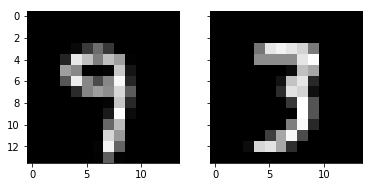

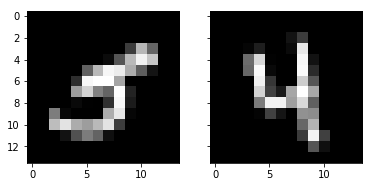

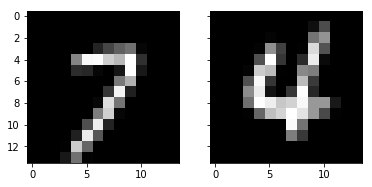

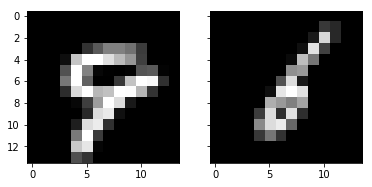

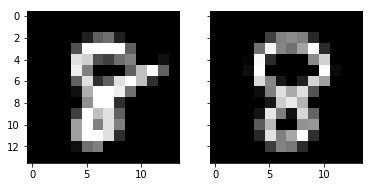

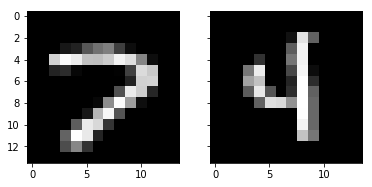

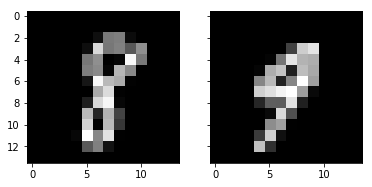

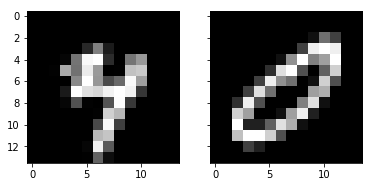

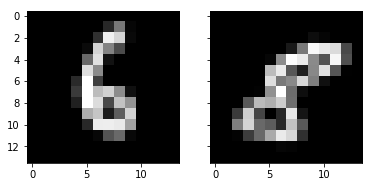

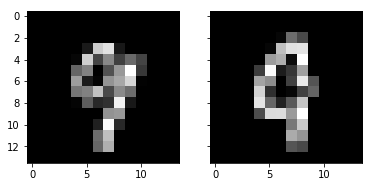

In [8]:
for i in range(10):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(train_input_0[i,0,:,:].cpu(), cmap='gray', interpolation='none')
    ax2.imshow(train_input_1[i,0,:,:].cpu(), cmap='gray', interpolation='none')

    plt.show()

In [9]:
train_classes_binary_0[:10]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], device='cuda:0')

In [10]:
train_classes_binary_1[:10]

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], device='cuda:0')

### TEST

In [11]:
test_classes[:10]

tensor([[0, 7],
        [4, 1],
        [8, 7],
        [2, 9],
        [5, 4],
        [0, 0],
        [7, 6],
        [1, 9],
        [6, 8],
        [1, 7]], device='cuda:0')

In [12]:
test_pred_0[0][:10]

tensor([0, 4, 8, 2, 5, 0, 9, 1, 6, 1], device='cuda:0')

In [13]:
test_pred_1[0][:10]

tensor([7, 1, 7, 9, 4, 0, 6, 5, 8, 7], device='cuda:0')

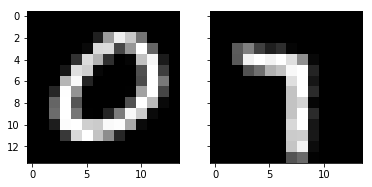

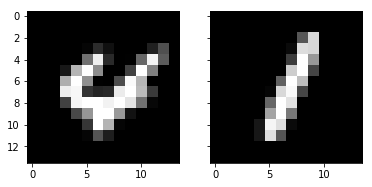

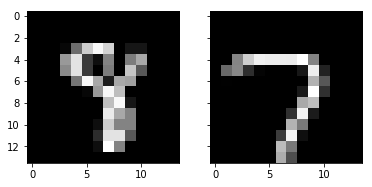

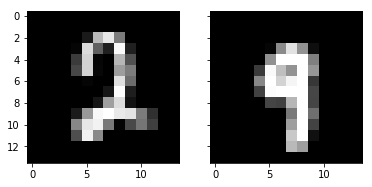

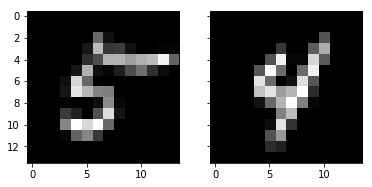

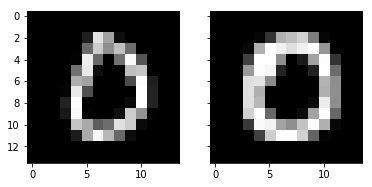

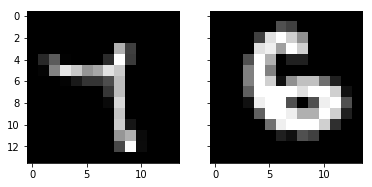

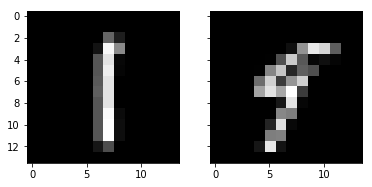

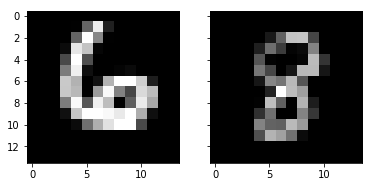

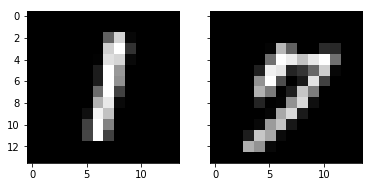

In [14]:
for i in range(10):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(test_input_0[i,0,:,:].cpu(), cmap='gray', interpolation='none')
    ax2.imshow(test_input_1[i,0,:,:].cpu(), cmap='gray', interpolation='none')

    plt.show()

In [15]:
test_classes_binary_0[:10]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [16]:
test_classes_binary_1[:10]

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], device='cuda:0')